In [ ]:
print(df.columns)


Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


<ipython-input-5-96b4c06571ec>:14: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])
<ipython-input-5-96b4c06571ec>:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill missing values


Missing values in each column:
Region                                      28
Date                                        28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

Dataset summary statistics:
                                Date   Estimated Unemployment Rate (%)  \
count                            768                        768.000000   
mean   2019-12-20 01:48:45.000000256                         11.627969   
min              2019-05-31 00:00:00                          0.000000   
25%              2019-08-31 00:00:00                          4.720000   
50%              2019-12-31 00:00:00                          8.350000   
75%              2020-03-31 00:00:00                         15.472500   
max              2020-06-30 00:00:00                         76.740000   
std   

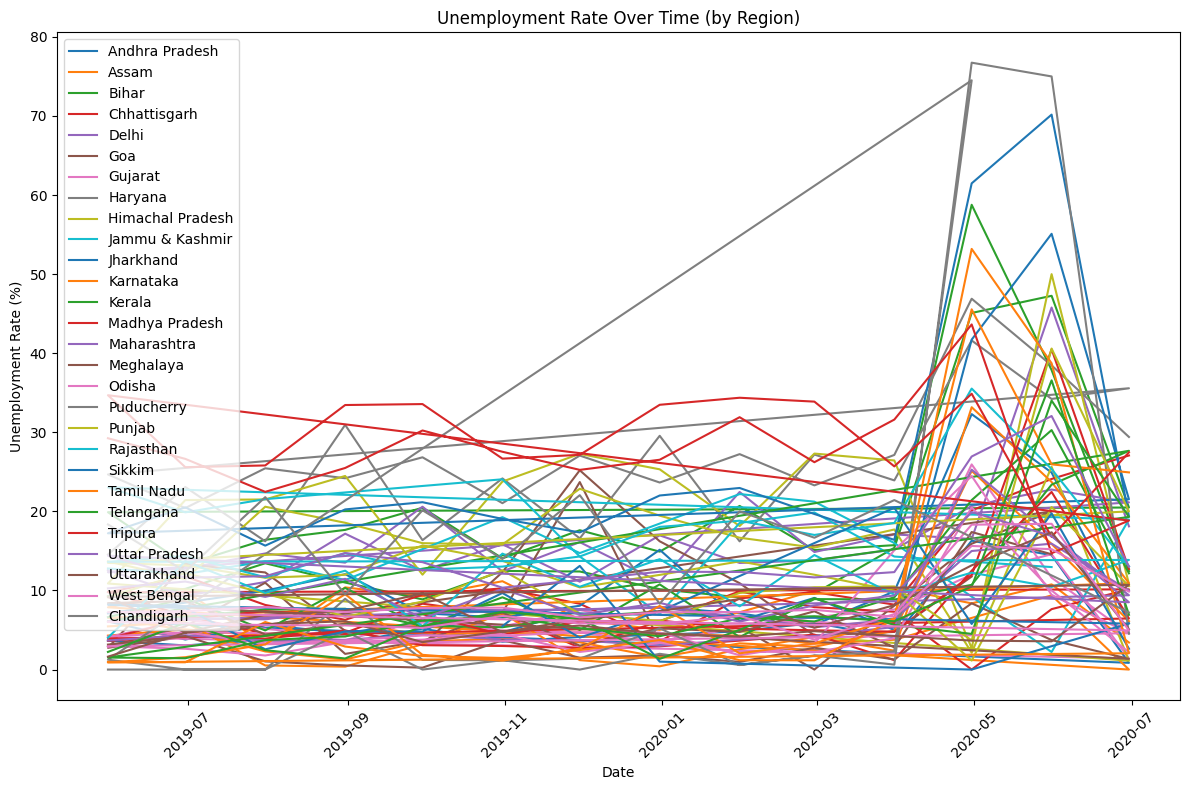

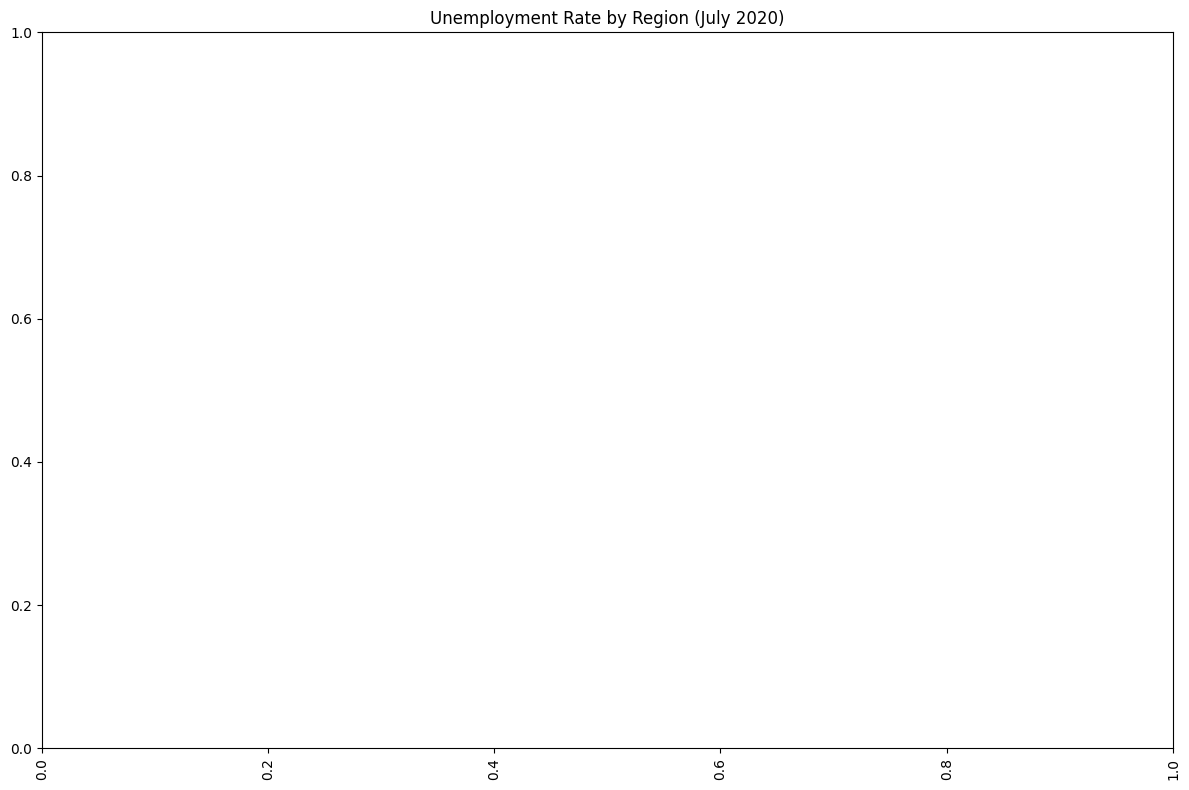

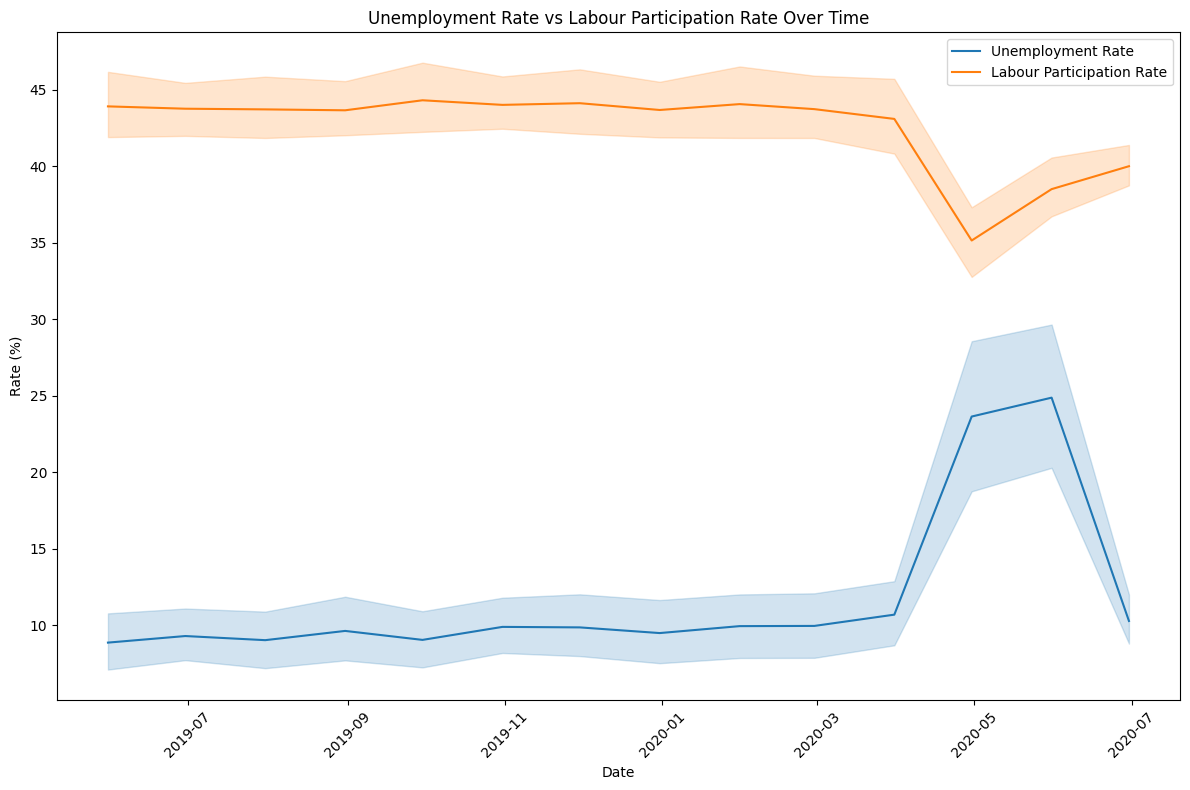

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Unemployment in India.csv')

# Rename columns to remove leading/trailing spaces
df.rename(columns={' Date': 'Date'}, inplace=True)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Check for missing values and handle them if necessary
print("Missing values in each column:")
print(df.isnull().sum())
df.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Explore the dataset: summary statistics
print("\nDataset summary statistics:")
print(df.describe())

# Plot unemployment rate over time for all regions
plt.figure(figsize=(12, 8))
for region in df['Region'].unique():
    region_data = df[df['Region'] == region]
    plt.plot(region_data['Date'], region_data[' Estimated Unemployment Rate (%)'], label=region)
plt.title('Unemployment Rate Over Time (by Region)')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot unemployment rate across different states for a specific time period (e.g., July 2020)
df_july_2020 = df[df['Date'] == '2020-07-01']
plt.figure(figsize=(12, 8))
sns.barplot(x='Region', y=' Estimated Unemployment Rate (%)', data=df_july_2020)
plt.title('Unemployment Rate by Region (July 2020)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Compare unemployment and labor participation rates over time
plt.figure(figsize=(12, 8))
sns.lineplot(x='Date', y=' Estimated Unemployment Rate (%)', data=df, label='Unemployment Rate')
sns.lineplot(x='Date', y=' Estimated Labour Participation Rate (%)', data=df, label='Labour Participation Rate')
plt.title('Unemployment Rate vs Labour Participation Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Rate (%)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
